In **Module Two**, you will delve into a wider variety of supervised learning methods for both classification and regression, learning about the connection between model complexity and generalization performance, the importance of proper feature scaling, and how to control model complexity by applying techniques like regularization to avoid overfitting.  In addition to k-nearest neighbors, this week covers linear regression (least-squares, ridge, lasso, and polynomial regression), logistic regression, support vector machines, decision trees, and the use of cross-validation for model evaluation.  For this week’s assignment, you’ll explore the relationship between model complexity and generalization performance, by looking at the effect of key parameters on the accuracy of different classification and regression models.

## Review

## Core of the method

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

![scaling_function](scaling_function.png)

## Why to normalize prior model fitting?

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

## What's the difference between `fit` and `fit_transform` in scikit-learn models?
To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation:

`x′= x - μ / σ`

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the exact same two parameters μ and σ (values) that you used for centering the training set.

**Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state. Afterwards, you can call its transform() method to apply the transformation to any particular set of examples.**

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, while also returning the transformed x′. `Internally, the transformer object just calls first fit() and then transform() on the same data.`

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams['figure.facecolor'] = '#00000000'


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


fruits = pd.read_table('data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple' ,'mandarin' ,'orange' ,'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits,y_fruits,
                                                    random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled,y_train)

print('Accuracy of K-NN classifier on training set: {}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'#how to get rid of decimals
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5,2.2,10,0.70]]
# here, we use `transform` not `fit_transform` to make it uses mean & std we got above.
example_fruit_scaled = scaler.transform(example_fruit)

print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])
# -1 : Cuz labelling in list starts from 0 but in labels in the data set 
# it starts from 1,2,3,4 according to each fruit type.

print('\n\n')
print(knn.predict(example_fruit_scaled))
print(example_fruit_scaled)

Accuracy of K-NN classifier on training set: 0.9545454545454546
Accuracy of K-NN classifier on test set: 0.80
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin



[2]
[[ 0.15789474 -1.05555556 -0.26618705  0.3030303 ]]


## Code inspection.

In [2]:
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


In [3]:
X_train_scaled[:15]

array([[0.49230769, 0.41176471, 0.27857143, 0.72972973],
       [0.93846154, 0.44117647, 0.35      , 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.50769231, 0.52941176, 0.27142857, 0.37837838],
       [0.46153846, 0.41176471, 0.31428571, 0.67567568],
       [0.72307692, 0.        , 0.2       , 0.48648649],
       [0.52307692, 0.35294118, 0.3       , 0.7027027 ],
       [0.50769231, 0.44117647, 0.27857143, 0.64864865],
       [0.63076923, 0.02941176, 0.14285714, 0.48648649],
       [0.47692308, 0.5       , 0.30714286, 0.75675676],
       [0.56923077, 0.14705882, 0.14285714, 0.45945946],
       [0.8       , 0.5       , 0.45714286, 0.59459459],
       [0.47692308, 0.55882353, 0.28571429, 0.37837838],
       [0.04615385, 0.        , 0.01428571, 0.59459459],
       [0.61538462, 0.58823529, 0.47857143, 0.72972973]])

# 1) Datasets

In [4]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset
import matplotlib.pyplot as plt

# synthetic dataset for simple regression.
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
x1, y1= make_regression(n_samples = 100 , n_features=1,
                          n_informative = 1, bias=150.0,
                          noise = 30 , random_state=0)
plt.scatter(x1,y1 , marker='o' ,s=50)
plt.show()

<IPython.core.display.Javascript object>

In [5]:
#synthetic dataset for more complex regression.
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
x2,y2 = make_friedman1(n_samples = 100, n_features=7 , random_state = 0)
plt.scatter(x2[:, 2],y2,marker='o',s=50)
plt.show()

<IPython.core.display.Javascript object>

In [6]:
# synthetic dataset for classification (binary)
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with 2 informative features')
x3,y3 = make_classification(n_samples =100,n_features=2,n_redundant=0,
                            n_informative = 2,n_clusters_per_class=1,
                            flip_y=0.1,class_sep=0.5,random_state=0)
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.scatter(x3[:, 0], x3[:, 1], c=y3,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>

In [7]:
# More difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable.
from sklearn.datasets import make_blobs
x4,y4 = make_blobs(n_samples=100 , n_features=2,centers=8,
                 cluster_std=1.3 , random_state=4)
y4 = y4 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.scatter(x4[:,0] , x4[:,1],c=y4 ,marker='o',s=50 ,cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>

- To illustrate a real-world regression problem, we'll use a dataset derived from the communities and crime dataset in the UCI repository. Our dataset uses a subset of the original features and target values. Which were originally created from combining several U.S. government data sources, like the U.S. census. Each data instance corresponds to a particular geographic area, typically a town or a region of a city.

            - Our version of this dataset has 88 features that encode various demographic and social economic properties of each location.With 1994 location data instances.The target value that we'll try to predict is the per capita violent crime rate.

In [8]:
# Communities and Crime dataset for regression
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

crime = pd.read_table('data/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

X_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

# 2) K-Nearest Neighbors: Classification and Regression.

## 1. Classification


- In the k = 1 case, the training score is a perfect 1.0. But the test score is only 0.80. As k increases to 3, the training score drops to 0.88 but the test score rises slightly 2.88, indicating the model is generalizing better to new data. When k = 11, the training score drops a bit further to 0.81, but the test score even better at 0.92, **indicating that this simple model is much more effective at ignoring minor variations in training data. And instead capturing the more important global trend in where the classes tend to be located with the best overall generalization performance as a result.**

In [9]:
# here we'll be using the data of Sample binary classification
# problem with 2 informative features.(x3,y3)
# plus we'll be calling the function of plotting from the shared utilities.

from adspy_shared_utilities import plot_two_class_knn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x3,y3,random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Regression.
Because the target values in a regression problem are continuous as compared to the discrete values that we see for classifier target labels. To assess how well a regression model fits the data, we use a regression score called r-squared that's between 0 and 1. We'll cover some additional types of regression evaluation scores later in the course. 
- For the r-squared value, a value of 1 corresponds to the best possible performance. A model that makes perfect predictions.A value of 0 corresponds to a model that makes a constant value prediction that's always just a mean value of all the training target values.The r-squared value is sometimes known as the coefficient of determination.

In [10]:
# here we gona use the regression data (x1,y1)
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test , y_train,y_test = train_test_split(x1,y1,random_state=0)

knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg.fit(X_train, y_train)

# the prediction of X_test
print(knnreg.predict(X_test))

# the score of the model
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


- NOTE_1: The `numpy.linspace()` function returns number spaces evenly w.r.t interval. Similar to `numpy.arange()` function but instead of step it uses sample number. 
- NOTE_2: The tight_layout() function in pyplot module of matplotlib library is used to automatically `adjust subplot` parameters to give specified `padding`(stuffing).

In [11]:
# here we gona use the regression data (x1,y1)

fig ,subaxes = plt.subplots(1,2,figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
# x1 shape(100, 1), we want just 20 points from the first and counting to 
# the 5th point & take it and so forth it ends up (20, 1).
X_train,X_test,y_train,y_test = train_test_split(x1[0::5],
                                                 y1[0::5],random_state=0)

for this_axis , k in zip(subaxes,[1,3]):
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    this_axis.set_xlim([-2.5,0.75])
    this_axis.plot(X_predict_input,y_predict_output,'^', alpha=0.8 ,
                   markersize = 10, label='predicted')
    this_axis.plot(X_train, y_train,'o', alpha=0.8 ,
                   markersize = 7, label='True value')
    
    this_axis.set_xlabel('Input feature')
    this_axis.set_ylabel('Target value')
    this_axis.set_title('KNN regression (K={})'.format(k))
    this_axis.legend()


plt.tight_layout()    

<IPython.core.display.Javascript object>

## Code inspection.

In [12]:
x1.shape ,y1.shape

((100, 1), (100,))

In [13]:
# take the 1st then counting till the 5th and take it
x1[0::5].shape

(20, 1)

In [14]:
X_predict_input.reshape(-1,1).shape , y_predict_output.shape 

((50, 1), (50,))

### Regression model complexity as a function of K

- As the value of k increases, which we can see acts to smooth out these local variations to capture more of the global trend. Again the training set score drops, but the model gets better at generalizing to new data and the test score goes up as K increases.

        - Finally in this series, the model with k = 15 has the best test set performance, with an r-squared score of 0.485. Increasing k much further however to k = 55, results in both the training and test set scores dropping back down to lower levels, as the model now starts to `under-fit`. In other words, it's too simple to do well, even on the training data.

In [15]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x1, y1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<IPython.core.display.Javascript object>

## To Recap:
1. When the training data has many instances, or each instance has lots of features, this can really slow down the performance of a k-nearest neighbors model. So in general, if your data set has hundreds or thousands of features, you should consider alternatives to k-nearest neighbors models, especially if your data is sparse. Meaning that each instance has lots of features, but most of them are zero.
___
2. So to sum up, and as a review of what we saw in week one. The two key parameters for both regression and classification in nearest neighbors models are naturally n-neighbors which controls the value of the number of neighbors to consider and thus the model complexity, as we saw.
____
3. And the metric parameter which controls the distance function between points and thus which points are considered as nearest in finding neighbors. We didn't explore the metric parameter here and that's beyond the scope of this course. But in most cases, the default Euclidean setting words pretty well with most datasets.

# 3) Linear models for regression.
### 1. Linear regression

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


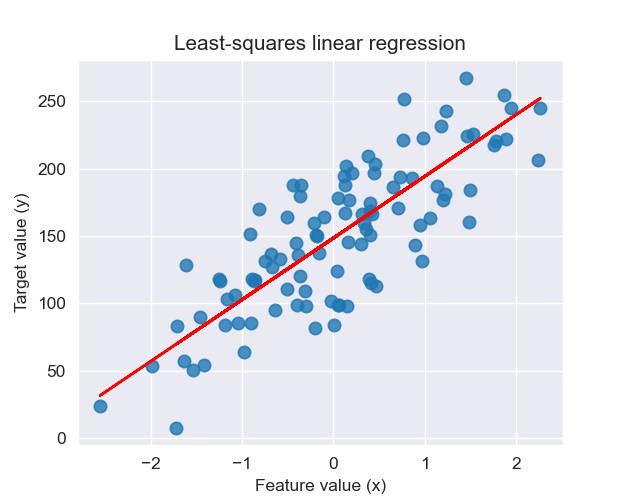

In [22]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x1, y1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# plot:
plt.figure(figsize=(5,4))
plt.scatter(x1, y1, marker= 'o', s=50, alpha=0.8)
plt.plot(x1, linreg.coef_ * x1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

![knn_k15](knn_k15.png)


1. Now that we have seen both K nearest neighbors regression and least-squares regression, it's interesting now to compare the least-squared linear regression results with the K nearest neighbors result. Here we can see how these two regression methods represent two complementary types of supervised learning.

2. The K nearest neighbor regresser doesn't make a lot of assumptions about the structure of the data, and gives potentially accurate but sometimes unstable predictions that are sensitive to small changes in the training data. So it has a correspondingly higher training set, R-squared score, compared to least-squares linear regression. K-NN achieves an R-squared score of 0.72 and least-squares achieves an R-squared of 0.679 on the training set.

3. On the other hand, linear models make strong assumptions about the structure of the data, in other words, that the target value can be predicted using a weighted sum of the input variables. And linear models give stable but potentially inaccurate predictions. However, in this case, it turns out that the linear model strong assumption that there's a linear relationship between the input and output variables happens to be a good fit for this dataset.

4. And so it's better at more accurately predicting the y value for new x values that weren't seen during training. And we can see that the linear model gets a slightly better test set score of 0.492 versus 0.471 for K nearest neighbors. And this indicates its ability to better generalize and capture this global linear trend.

In [17]:
# apply linear_regression to the `crime_data`.
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726021985
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482721e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

### 2. Ridge Regression.

In [18]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358463437
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.3851347

### -  Ridge regression with feature normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044156
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

### - Ridge regression with regularization parameter: alpha.

In [20]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
           r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88,            r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87,            r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87,            r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88,            r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86,            r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87,            r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84,            r-squared training: 0.31, r-squared test: 0.30



# 3- Lasso regression

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X_train,X_test,y_train,y_test = train_test_split(X_crime,y_crime,
                                                 random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha = 2,max_iter=10000).fit(X_train_scaled,y_train)

print('Crime dataset')
print('lasso regression linear model intercept :{:.2f}'
      .format(linlasso.intercept_))
print('lasso regression linear model coefficients :{}'
      .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-Squared score (training) : {:.3f}'
     .format(linlasso.score(X_train_scaled,y_train)))
print('R-Squared score (test) : {:.3f}'
     .format(linlasso.score(X_test_scaled,y_test)))

print('\n')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: abs(e[1]),reverse = True):
    # print the feature and its absolute weight.
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept :1186.61
lasso regression linear model coefficients :[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    -0.

Although we need to be careful in interpreting any results for data on a complex problem like crime, the lasso regression results do help us see some of the strongest relationships between the input variables and outcomes for this particular data set:
   - For example, looking at the top five features with non-zero weight that are found by lasso regression, we can see that location factors like percentage of people in dense housing, which indicates urban areas and socio economic variables like the fraction of vacant houses in an area are positively correlated with crime. And other variables like the percentage of families with two parents is negatively correlated. 

## Code inspection:
Sorted() sorts any sequence (list, tuple) and always returns a list with the 
elements in sorted manner, without modifying the original sequence.

Syntax : sorted(iterable, key, reverse)

`sorted()` takes **three parameters** from which two are optional.
- Iterable : sequence (list, tuple, string) or collection (dictionary, set, frozenset) or any other iterator that needs to be sorted.
- Key(optional) : A function that would server as a key or a basis of sort comparison.
- Reverse(optional) : If set true, then the iterable would be sorted in reverse (descending) order, by default it is set as false.

In [96]:
# list(X_crime) : gives us the 88 feasures name (columns)
# linlasso.coef_ : gives us the weight of each feature
# zip() : puts the above 2 into Tuple.
# list() : puts all the 88 tuple into list. 

# so now, we can iterate over all features (tuple) and their weights.
# for each 'e' which is the tuple in the list of tuples ,we gonna sort them
# according to this function lambda e: abs(e[1])

# weight 
list(zip(list(X_crime), linlasso.coef_))#[0][1]

# absolute(weight).
# we can replace - with reverse = True to order e[1] Descendingly.
sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1]))[:10]

[('PctKidsBornNeverMar', 1488.3651222865146),
 ('PctKids2Par', -1188.7396867043215),
 ('HousVacant', 459.5379990335851),
 ('PctPersDenseHous', 339.04468804185274),
 ('NumInShelters', 264.93206554567274),
 ('MalePctDivorce', 259.32889225996206),
 ('PctWorkMom', -231.42347299198713),
 ('pctWInvInc', -169.6756445649251),
 ('agePct12t29', -168.18346054422776),
 ('PctVacantBoarded', 122.69221825705178)]

###  - Lasso regression with regularization parameter: alpha
The selection of alpha depends on other factors such as the kind of preprocessing methods being used.

In [106]:
print('- Lasso regression effect of alpha regularization \n\
- number of features kept in final model.\n')
    
X_train,X_test,y_train,y_test = train_test_split(X_crime,y_crime,
                                                 random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in [0.5,1,2,3,5,10,20,50]:
    linlasso = Lasso(alpha , max_iter=10000).fit(X_train_scaled,y_train)
    R_squred_train = linlasso.score(X_train_scaled,y_train)
    R_squred_test = linlasso.score(X_test_scaled,y_test)
    num_features_kept = np.sum(linlasso.coef_ !=0)
    print('Alpha = {:.2f}\nFeatures kept: {}, R-squared `Training`: {:.2f}, \
R-squared `Test`: {:.2f}\n'
.format(alpha,num_features_kept,R_squred_train,R_squred_test))

- Lasso regression effect of alpha regularization 
- number of features kept in final model.

Alpha = 0.50
Features kept: 35, R-squared `Training`: 0.65, R-squared `Test`: 0.58

Alpha = 1.00
Features kept: 25, R-squared `Training`: 0.64, R-squared `Test`: 0.60

Alpha = 2.00
Features kept: 20, R-squared `Training`: 0.63, R-squared `Test`: 0.62

Alpha = 3.00
Features kept: 17, R-squared `Training`: 0.62, R-squared `Test`: 0.63

Alpha = 5.00
Features kept: 12, R-squared `Training`: 0.60, R-squared `Test`: 0.61

Alpha = 10.00
Features kept: 6, R-squared `Training`: 0.57, R-squared `Test`: 0.58

Alpha = 20.00
Features kept: 2, R-squared `Training`: 0.51, R-squared `Test`: 0.50

Alpha = 50.00
Features kept: 1, R-squared `Training`: 0.31, R-squared `Test`: 0.30



## 4- Polynomial regression

In [112]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(x2,y2,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\n Now we transform the original input data to add \n\
polynomial features up to degree 2 (Quadratic)\n')
poly = PolynomialFeatures(degree=2)
x2_poly = poly.fit_transform(x2)

X_train, X_test, y_train, y_test = train_test_split(x2_poly, y2,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))


print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(x2_poly, y2,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

 Now we transform the original input data to add 
polynomial features up to degree 2 (Quadratic)

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-square

## 4) Linear models for classification: Logistic regression
**Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)**

In [156]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import(plot_class_regions_for_classifier_subplot)

#fig,subaxes = plt.subplots(1,1,figsize=(7,5))
#y_fruits_apple = y_fruits_2d == 1
#X_train,X_test,y_train,y_test = (train_test_split(X_fruits_2d,y_fruits_apple,
#                                                 random_state = 0))


# classifier
clf = LogisticRegression(C=100).fit(X_train,y_train)

# prediction
h=6
w=8
print('A fruit of height={} & width={} is priticted to be `{}`'
      .format(h,w,['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h=10
w=7
print('A fruit of height={} & width={} is predicted to be `{}`'
      .format(h,w,['not an apple' , 'an apple'][clf.predict([[h,w]])[0]]))

# Accuracy
print('Accuracy of Logistic regression classifier on `training` set :{:.2f}'
      .format(clf.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on `test` set :{:.2f}'
      .format(clf.score(X_test,y_test)))

A fruit of height=6 & width=8 is priticted to be `an apple`
A fruit of height=10 & width=7 is predicted to be `not an apple`
Accuracy of Logistic regression classifier on `training` set :0.80
Accuracy of Logistic regression classifier on `test` set :0.73


<ipython-input-156-fbab2412da09>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w,['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
<ipython-input-156-fbab2412da09>:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w,['not an apple' , 'an apple'][clf.predict([[h,w]])[0]]))


![Logistic_regression](Logistic_regression.png)
![diff_C](diff_C.png)

### Code inspection.

In [149]:
clf.predict([[h,w]])

array([False])

In [150]:
clf.predict([[h,w]])[0]

False

In [151]:
['not an apple' , 'an apple'][True]

'an apple'

### - Application to real Dataset.
Although the real power of regularization doesn't become evident until we have data that has higher dimensional feature spaces. You can get an idea of the trade off that's happening between relying on a simpler model, one that puts more emphasis on a single feature in this case, out of the two features, but has lower training set accuracy. And that's an example as shown on the left with C = 0.1. Or, better training data fit on the right with C = 100. 

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,
                                                 random_state=0)

clf = LogisticRegression().fit(X_train,y_train)
print('Breast Cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast Cancer dataset
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5) Linear Classifiers: Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                          None, None, title, subaxes)

![svm](svm.png)

### Linear Support Vector Machine: the IMPACT of C parameter
Here's an example in the notebook showing the effect of varying C on this basic classification problem. On the right, when C is large, the decision boundary is adjusted so that more of the black training points are correctly classified. While on the left, for small values of C, the classifier is more tolerant of these errors in favor of capturing the majority of data points correctly with a larger margin.

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

# tuple unnpacking
for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

![svm_diff_C](svm_diff_C.png)

### - Application to real Dataset.

In [182]:
from sklearn.svm import LinearSVC

X_train,X_test,y_tain,y_test = train_test_split(X_cancer , y_cancer,
                                                random_state=0)
clf = LinearSVC().fit(X_train,y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.95


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# 6) how do we deal with this multiclass classification situation with scikit-learn?

- Well, fortunately scikit-learn makes it very easy to learn multiclass classification models. Essentially, it does this by converting a multiclass classification problem into a series of binary problems. What do I mean by that? Well, essentially when you pass in a dataset that has a categorical variable for the target value, scikit-learn detects this automatically and then for each class to be predicted. Scikit-learn creates one binary classifier that predicts that class against all the other classes.
____
- So for example, in the fruit dataset there are four categories of fruit. So scikit-learn learns four different binary classifiers. To predict a new data instance, what it then does is, takes that data instance to be predicted, whose labels to be predict, and runs it against each of the binary classifiers in turn, and the classifier that has the highest score is the one that, whose class it uses, as the prediction value.

In [30]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.30006303  0.71557482]
 [-1.62785586  1.15837035]
 [ 0.00721513  0.43311565]
 [ 1.2474674  -1.64209043]]
Intercepts:
 [-3.28519908  1.19823407 -3.04188368  1.16397746]


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### -Multi-class results on the fruit dataset.

In [31]:
fruits = pd.read_table('data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple' ,'mandarin' ,'orange' ,'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

<IPython.core.display.Javascript object>


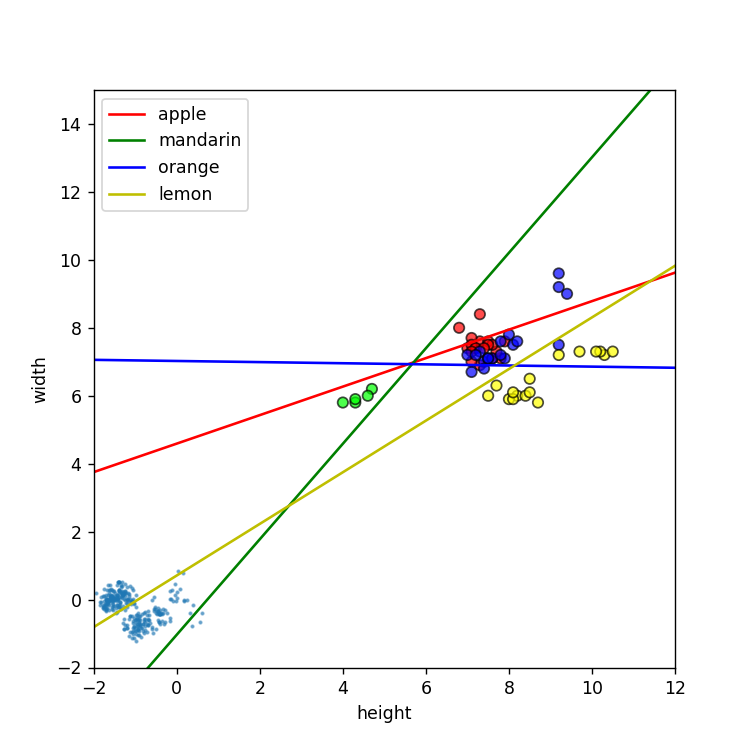

In [32]:
import matplotlib
plt.figure(figsize=(6,6))
colors = ['r','g','b','y']
cmap_fruits = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d['height'],X_fruits_2d['width'],
            c=y_fruits_2d, cmap=cmap_fruits , edgecolor = 'black',alpha=.7)

x_0_range = np.linspace(-10,15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    plt.plot(x_0_range, -(w[0]*x_0_range +b)/w[1] , c=color)
    
# important NOTE:    LOOK at your hand writen notes as well.
# Since class prediction with a linear model uses the formula
# y = w_0 x_0 + w_1 x_1 + b,and the decision boundary is defined as being
# all points with y = 0, to plot x_1 as a function of x_0 we just solve
# w_0 x_0 + w_1 x_1 + b = 0 for x_1:

plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2,12)
plt.ylim(-2,15)
plt.show()

## Code inspection:

In [210]:
x_0_range = np.linspace(-10, 15)
x_0_range

array([-10.        ,  -9.48979592,  -8.97959184,  -8.46938776,
        -7.95918367,  -7.44897959,  -6.93877551,  -6.42857143,
        -5.91836735,  -5.40816327,  -4.89795918,  -4.3877551 ,
        -3.87755102,  -3.36734694,  -2.85714286,  -2.34693878,
        -1.83673469,  -1.32653061,  -0.81632653,  -0.30612245,
         0.20408163,   0.71428571,   1.2244898 ,   1.73469388,
         2.24489796,   2.75510204,   3.26530612,   3.7755102 ,
         4.28571429,   4.79591837,   5.30612245,   5.81632653,
         6.32653061,   6.83673469,   7.34693878,   7.85714286,
         8.36734694,   8.87755102,   9.3877551 ,   9.89795918,
        10.40816327,  10.91836735,  11.42857143,  11.93877551,
        12.44897959,  12.95918367,  13.46938776,  13.97959184,
        14.48979592,  15.        ])

<IPython.core.display.Javascript object>


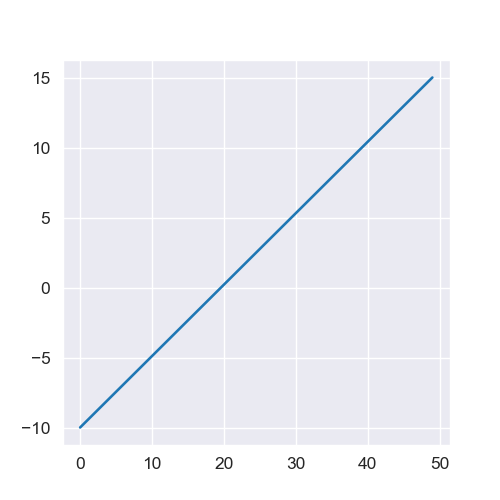

In [211]:
# how the vector is ploted?
plt.figure(figsize=(4,4))
plt.plot(x_0_range);

In [196]:
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    print(w,b,color)

[-0.30006303  0.71557482] -3.2851990828661553 r
[-1.62785586  1.15837035] 1.198234072521307 g
[0.00721513 0.43311565] -3.04188367670338 b
[ 1.2474674  -1.64209043] 1.163977455448316 y


# 7) Kernelized Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train,X_test,y_train,y_test  = train_test_split(x2,y2,random_state=0)
# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

![RBF_kernel](RBF_kernel.png)
![Polynomial_kernel](Polynomial_kernel.png)

## Support Vector Machine with RBF kernel: 
 ### - gamma parameter

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

![gamma_effect](gamma_effect.png)

## Support Vector Machine with RBF kernel: 
 ### - gamma  & C parameter.

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

![effect_of_gamma_C](effect_of_gamma_C.png)

## Application of SVMs to a real dataset: unnormalized data(Cancer data):

### - The importance of Normalization

In [223]:
from sklearn.svm import SVC
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,
                                                 random_state=0)
clf = SVC(C=10).fit(X_train,y_train)
print('Breast cancer dataset(unnormalied features)')
print('Accuracy of RBF-Kernel SVC on training set: {:.2f}'
      .format(clf.score(X_train,y_train)))
print('Accuracy of RBF-Kernel SVC on test set: {:.2f}'
      .format(clf.score(X_test,y_test)))

Breast cancer dataset(unnormalied features)
Accuracy of RBF-Kernel SVC on training set: 0.92
Accuracy of RBF-Kernel SVC on test set: 0.94


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling.

In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled,y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


# 8) Cross-Validation.
- Cross-validation is a method that goes beyond evaluating a single model using a single Train/Test split of the data by using multiple Train/Test splits, each of which is used to train and evaluate a separate model. So why is this better than our original method of a single Train/Test split? Well, you may have noticed for example by choosing different values for the random state seed parameter in the Train/Test split function, when you're working on some examples or assignments, that the `accuracy score` you get from running a classifier can vary quite a bit just by chance depending on the specific samples that happen to end up in the `training set`.
____
- Cross-validation basically gives more stable and reliable estimates of how the classifiers likely to perform on average by running multiple different training test splits and then averaging the results, instead of relying entirely on a single particular training set.

![cross_validation](cross_validation.png)

**Example based on K-NN classifier with fruit dataset (2 features).**

In [235]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
x = X_fruits_2d
y = y_fruits_2d

# cv =  : select the number of folds you want , its default=5
# cross_val_score : gives us the accuracy score on the training set for each
# fold.
cv_scores = cross_val_score(clf,x,y, cv=3)
print('Cross-Validation scores(3-folds):',cv_scores)
print('Mean cross-Validation score (3-folds): {:.3f}' 
      .format(np.mean(cv_scores)))

Cross-Validation scores(3-folds): [0.8        0.75       0.84210526]
Mean cross-Validation score (3-folds): 0.797


![stratified_cross_val](stratified_cross_val.png)
![stratified_cross_val2](stratified_cross_val2.png)
![leave_one_out_cross_val](leave_one_out_cross_val.png)
- Of course this uses even more computation, but for `small data sets` in particular, it can provide improved proved estimates because it gives the maximum possible amount of training data to a model, and that may help the performance of the model when the training sets are small.

### Validation Curve Example.

- Sometimes we want to evaluate the effect that an important parameter of a model has on the cross-validation scores.

In [242]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# The numpy.logspace() function returns number spacesevenly w.r.t 
# interval on a log scale:
parameter_range = np.logspace(-3,3,4)
train_scores , test_scores = validation_curve(SVC(),x,y,param_name = 'gamma',
                                           param_range = parameter_range,cv=3)
parameter_range

array([1.e-03, 1.e-01, 1.e+01, 1.e+03])

 ## - Result interpretation
- Validation curve will return two two-dimensional arrays corresponding to evaluation on the training set and the test set:

Each array has `one row per parameter value` in the sweep, and the number of `columns is the number of cross-validation folds` that are used.
- For example, the code shown here will fit three models using a radio basis functions support vector machine on different subsets of the data corresponding to the three different specified values of the kernels gamma parameter.

In [244]:
print(train_scores)

[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]


In [245]:
print(test_scores)

[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


## Plotting `Validation Curve`
### semilog():
- This function is used to visualize data in a manner that the x-axis is converted to log format. This function is particularly useful when one of the parameters is extremely large and thus stored in a compact manner initially.

### Return: A log-scaled plot on the x-axis.
### Parameters: Some important parameters are:
- x: Values on X-axis.
- y: Values on Y-axis.
- color: (optional) Color of the line or the symbol.
- linewidth: (optional) Width of the line.
- label: (optional) Specifies the label of the graph
- basex: (optional) The base of the x logarithm. The scalar should be larger than 1.
- subsx: (optional) The location of the minor xticks; None defaults to autosubs, which depend on the number of decades in the plot.
- nonposx: (optional) Non-positive values in x can be masked as invalid, or clipped to a very small positive number.
- marker: (optional) Displays the points as the mentioned symbol.
- markersize: (optional) Changes the size of all the markers.

<IPython.core.display.Javascript object>


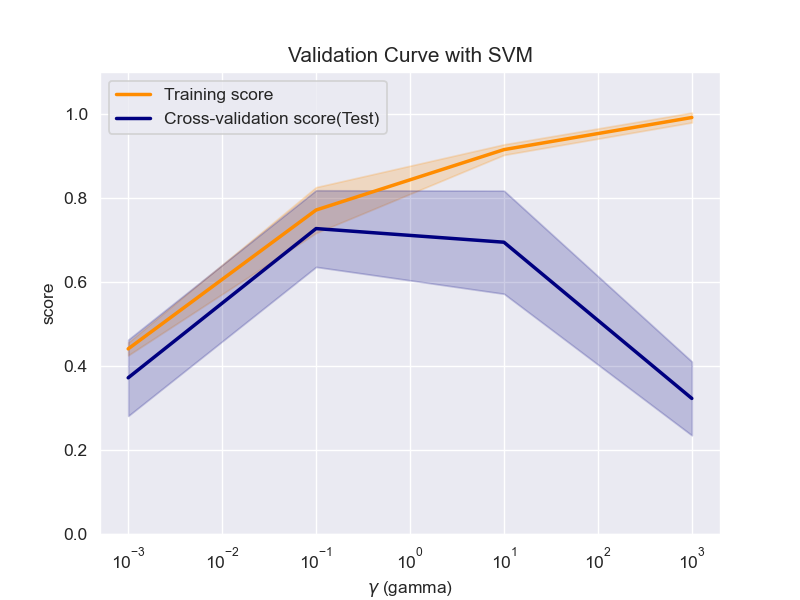

In [270]:
plt.figure()
# mean and std of each parameter value in the sweep
train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('score')
plt.ylim(0,1.1)
lw=2 # line width(thickniess)

plt.semilogx(parameter_range,train_scores_mean, lw=lw ,
             label='Training score',color='darkorange')
plt.semilogx(parameter_range,test_scores_mean, lw=lw ,
             label='Cross-validation score(Test)', color='navy')

# Noticing the variation in mean via add\ subtract STD.
plt.fill_between(parameter_range,train_scores_mean+train_scores_std,
                 train_scores_mean-train_scores_std, alpha =0.2,
                 color='darkorange')

plt.fill_between(parameter_range,test_scores_mean+test_scores_std,
                 test_scores_mean-test_scores_std, alpha =0.2,
                 color='navy')
                 
plt.legend();

# 9) Decision Trees

In [272]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,
                                                    random_state = 3)

clf = DecisionTreeClassifier().fit(X_train,y_train)

print('Accuracy of Decision Tree classifier on training set = {:.2f}'.
      format(clf.score(X_train,y_train)))

print('Accuracy of Decision Tree classifier on Test set = {:.2f}'.
      format(clf.score(X_test,y_test)))

Accuracy of Decision Tree classifier on training set = 1.00
Accuracy of Decision Tree classifier on Test set = 0.95


# The problem:
This is an indication that the tree is likely overfitting and in fact this is a problem with building decision trees in general that keep adding rules until the leafnodes are pure.Typically such trees are overly complex and essentially memorized the training data. So when building decision trees, we need to use some additional strategy to prevent this overfitting:
## solutions:
- One strategy to prevent overfitting is to prevent the tree from becoming really detailed and complex by stopping its growth early. This is called `pre-pruning`.
- Another strategy is to build a complete tree with pure leaves but then to prune back the tree into a simpler form. This is called`post-pruning or sometimes just pruning`.

![pruning](pruning.png)

## check:setting max decision tree depth to help avoid overfitting.

In [273]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set = {:.2f}'.
      format(clf2.score(X_train,y_train)))
print('Accuracy of Decision Tree classifier on Test set = {:.2f}'.
      format(clf2.score(X_test,y_test)))

Accuracy of Decision Tree classifier on training set = 0.98
Accuracy of Decision Tree classifier on Test set = 0.97


## Visualizing Decision Trees.

In [ ]:
# 1st classsifier 
plot_decision_tree(clf, iris.feature_names, iris.target_names)

![DT1](DT1.png)
![DT2](DT2.png)

In [ ]:
# 2nd classsifier 
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

![DT3.png](DT3.png)

- For larger trees that have say a depth of more than 5 or 10. Instead of trying to analyze all the paths in the tree it can be useful to see which paths most of the data takes. This can be done by looking for the largest samples values in the nodes. For example if we follow the largest samples values down this tree, we can see that a significant set of 35 virginica examples are classified perfectly when their petal length is greater than 5.05 centimeters.
___
- Another way of analyzing the tree instead of looking at the whole tree at once is to do what's called a feature important calculation. And this is one of the most useful and widely used types of summary analysis you can perform on a supervised learning model.
___
### Feature importance
- Feature importance is typically a number between 0 and 1 that's assigned to an individual feature. It indicates how important that feature is to the overall prediction accuracy. A feature importance of zero means that the feature is not used at all in the prediction. A feature importance of one, means the feature perfectly predicts the target. Typically, feature importance numbers are always positive and they're normalized so they sum to one.
![feature_importance](feature_importance.png)

Features names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importances: [0.00670338 0.03128242 0.06251049 0.89950372]


<IPython.core.display.Javascript object>


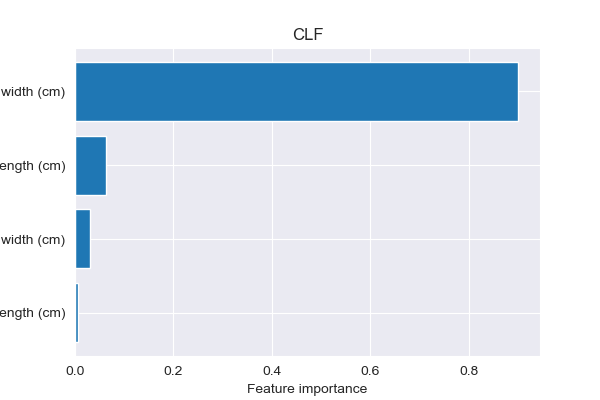

<IPython.core.display.Javascript object>


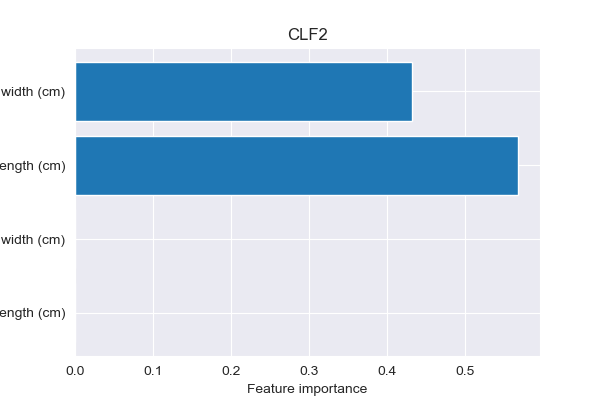

In [297]:
from adspy_shared_utilities import plot_feature_importances
print("Features names : " ,iris.feature_names)
print('Feature importances: {}'.format(clf.feature_importances_))

# for clf
plt.figure(figsize=(6,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.title('CLF')

# for clf2
plt.figure(figsize=(6,4), dpi=80)
plot_feature_importances(clf2, iris.feature_names)
plt.title('CLF2')


plt.show()

### Note:
- if a feature has a low feature importance value, that doesn't necessarily mean that the feature is not important for prediction. It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because the future may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction.

### Decision Trees on a real-World dataset.

In [300]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,
                                                 random_state=0)
clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=8
                             ,random_state=0).fit(X_train,y_train)


In [ ]:
plot_decision_tree(clf,cancer.feature_names,cancer.target_names)

![cancer_DT1](cancer_DT1.png)
![cancer_DT2](cancer_DT2.png)

Breast cancer dataset : decision tree
Accuracy of D-Tree classiffier on training set: 0.96
Accuracy of D-Tree classiffier on test set: 0.94


<IPython.core.display.Javascript object>


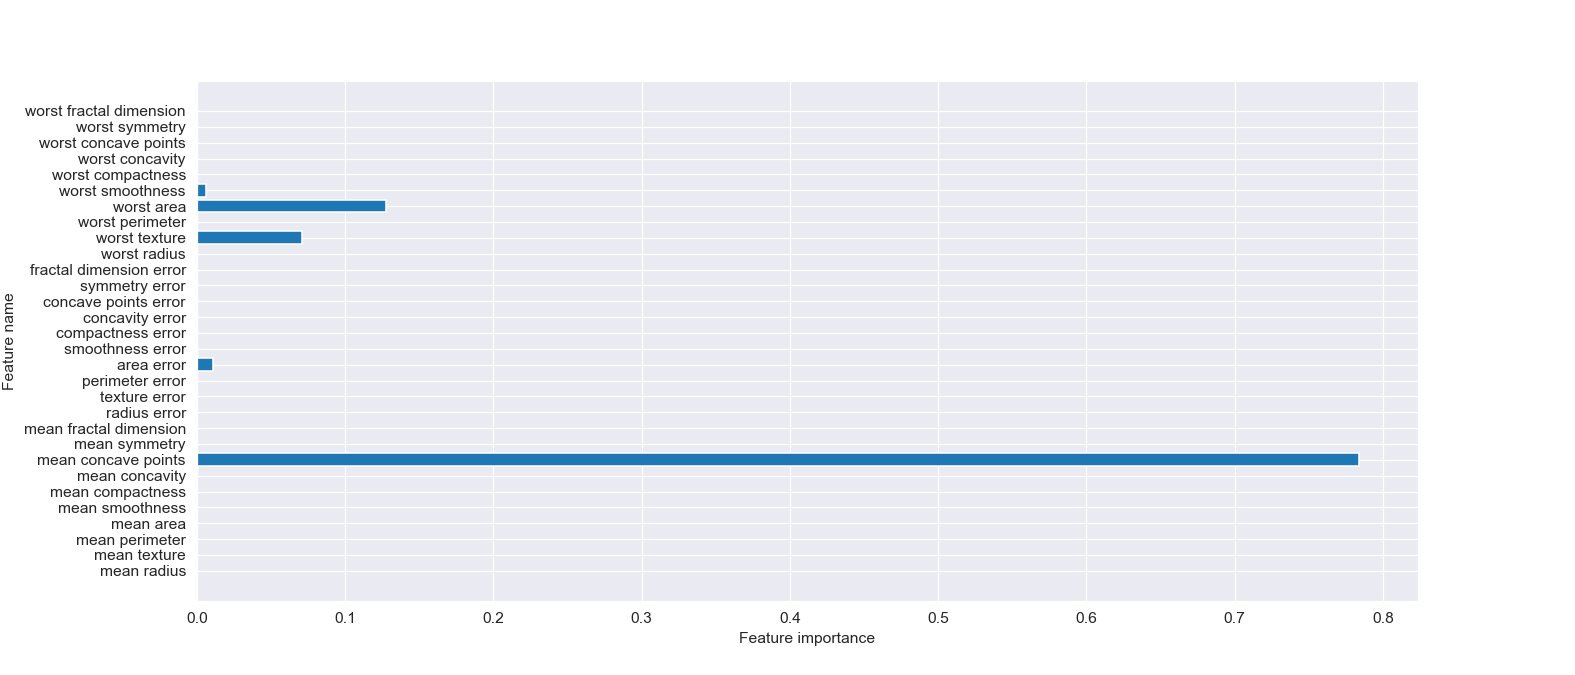

In [313]:
print('Breast cancer dataset : decision tree')
print('Accuracy of D-Tree classiffier on training set: {:.2f}'.
       format(clf.score(X_train,y_train)))
print('Accuracy of D-Tree classiffier on test set: {:.2f}'.
       format(clf.score(X_test,y_test)))
# lets plot the features's importance:
plt.figure(figsize = (14,6),dpi=90)
plot_feature_importances(clf,cancer.feature_names)

## Module 2 Quiz.

1. After training a ridge regression model, you find that the training and test set accuracies are 0.98 and 0.54 respectively. Which of the following would be the best choice for the next ridge regression model you train?

Answer:  You are overfitting, the next model trained should have a higher value for alpha.
____

2.  After training a Radial Basis Function (RBF) kernel SVM, you decide to increase the influence of each training point and to simplify the decision surface. Which of the following would be the best choice for the next RBF SVM you train?

Answer:  Decrease C and gamma
____

3. Which of the following is an example of multiclass classification? (Select all that apply)

Answer: Classify a set of fruits as apples, oranges, bananas, or lemons
___

4. Looking at the plot below which shows accuracy scores for different values of a regularization parameter lambda, what value of lambda is the best choice for generalization?

![quiz](quiz.png)

Answer : 10
___

5. Suppose you are interested in finding a parsimonious model (the model that accomplishes the desired level of prediction with as few predictor variables as possible) to predict housing prices. Which of the following would be the best choice?
    -  hint:
    parsimonious: Unwilling to spend money or use resources; stingy or frugal.

Answer:  Lasso Regression
____

6. Match the plots of SVM margins below to the values of the C parameter that correspond to them.
![quiz2](quiz2.png)

Answer:  0.1,  1,  10
___

Use Figures A and B below to answer questions 7, 8, 9, and 10.
![quiz3](quiz3.png)
![quiz4](quiz4.png)

7. Looking at the two figures (Figure A, Figure B), determine which linear model each figure corresponds to:

Answer:  Figure A: Ridge Regression, Figure B: Lasso Regression

8. Looking at Figure A and B, what is a value of alpha that optimizes the R2 score for the Ridge Model?

Answer: 3

9. Looking at Figure A and B, what is a value of alpha that optimizes the R2 score for the Lasso Model?

Answer: 10



10. When running a LinearRegression() model with default parameters on the same data that generated Figures A and B the output coefficients are:
    - Coef 0	-19.5
    - Coef 1	48.8
    - Coef 2	9.7
    - Coef 3	24.6
    - Coef 4	13.2
    - Coef 5	5.1
    
For what value of Coef 3 is R2 score maximized for the Lasso Model?

For what value of Coef 3 is R2 score maximized for the Ridge Model?

Aim of Q : find the value of Coef 3 at the alpha that maximized the R2 of the Lasso model.

Answer : 0 (Lasso)  & ~10 (Ridge).
___

11. Which of the following is true of cross-validation? (Select all that apply)

Answer: 
- Increases generalization ability and computational complexity.
- Helps prevent knowledge about the test set from leaking into the model.
- Fits multiple models on different splits of the data.

# Classifier Visualization Playground.
In order to better vizualize the decision boundaries, we'll perform `Principal Component Analysis (PCA)` on the data to `reduce the dimensionality to 2 dimensions`. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

## Principal component analysis (PCA).
### VM: How does PCA work?

- PCA is an unsupervised pre-processing task that is carried out before applying any ML algorithm. PCA is based on “orthogonal linear transformation” which is a mathematical technique to project the attributes of a data set onto a new coordinate system. The attribute which describes the most variance is called the first principal component and is placed at the first coordinate.


- Similarly, the attribute which stands second in describing variance is called a second principal component and so on. In short, the complete dataset can be expressed in terms of principal components. Usually, more than `90% of the variance is explained by two/three principal components`.


- Principal component analysis, or PCA, thus converts data from high dimensional space to low dimensional space by selecting the most important attributes that capture maximum information about the dataset.

source:
https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

In [65]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df= pd.read_csv('data/mushrooms.csv')
df2 = pd.get_dummies(df)

# Returns(float value * length of data frame values).
# For simplicity, it returns the percent you select from the original data
# you want a sample of.
df3 = df2.sample(frac=0.08) 


# spicify our features & Target value
# According to all the features in X is the Mushroom p_class or not?
X = df3.iloc[:,2:]
y = df3.iloc[:,1]

# i can get low dimentionalX features shrinked into 2 principalcomponents. 
pca = PCA(n_components=2).fit_transform(X)

# then, apply train_test_split on spa & y
X_train,X_test,y_train,y_test = train_test_split(pca,y,random_state=0)

<IPython.core.display.Javascript object>


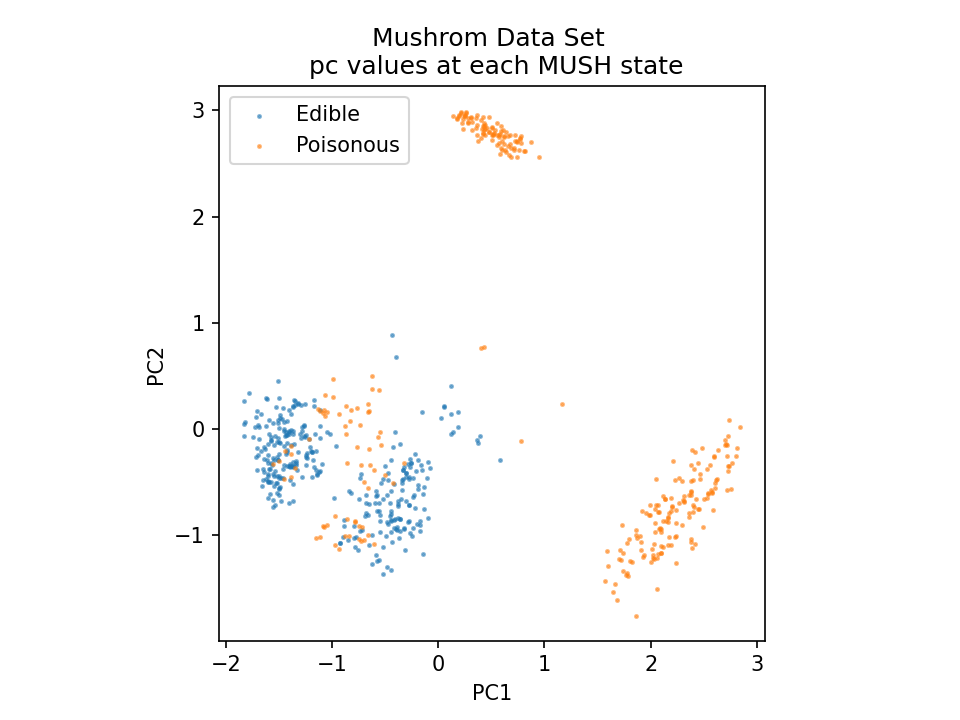

In [66]:
#plotting.
plt.figure(dpi=120)
# VM: since pca is 2d array  each one represents 1 principal componenet.
# so, we want to know the value of each 'pc' when the target value(y) is 0 or 1.

# Edible.
pc1_has_y0 = pca[y.values == 0,0] # value of 1st pc when y=0.
pc2_has_y0 = pca[y.values == 0,1] # value of 2nd pc when y=0.
# Poisonous.
pc1_has_y1 = pca[y.values == 1,0] # value of 1st pc when y=1.
pc2_has_y1 = pca[y.values == 1,1] # value of 2nd pc when y=1.

plt.scatter(pc1_has_y0,pc2_has_y0, alpha=0.5, label='Edible' , s=2)
plt.scatter(pc1_has_y1,pc2_has_y1, alpha=0.5, label='Poisonous' , s=2)
plt.title('Mushrom Data Set \n pc values at each MUSH state')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=2)

# To get equal frame length like square.
plt.gca().set_aspect('equal')

## The function that's gonna plot.

In [70]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

## 1. Logistic Regression

<IPython.core.display.Javascript object>


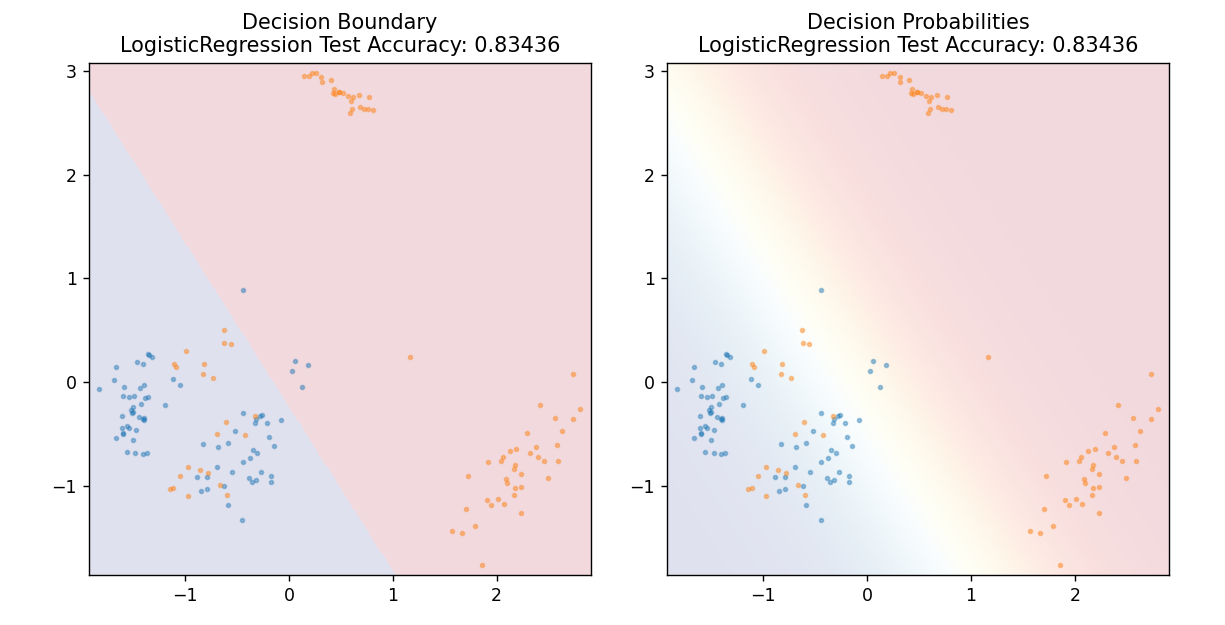

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

## 2. K-Nearst Neighbors

<IPython.core.display.Javascript object>


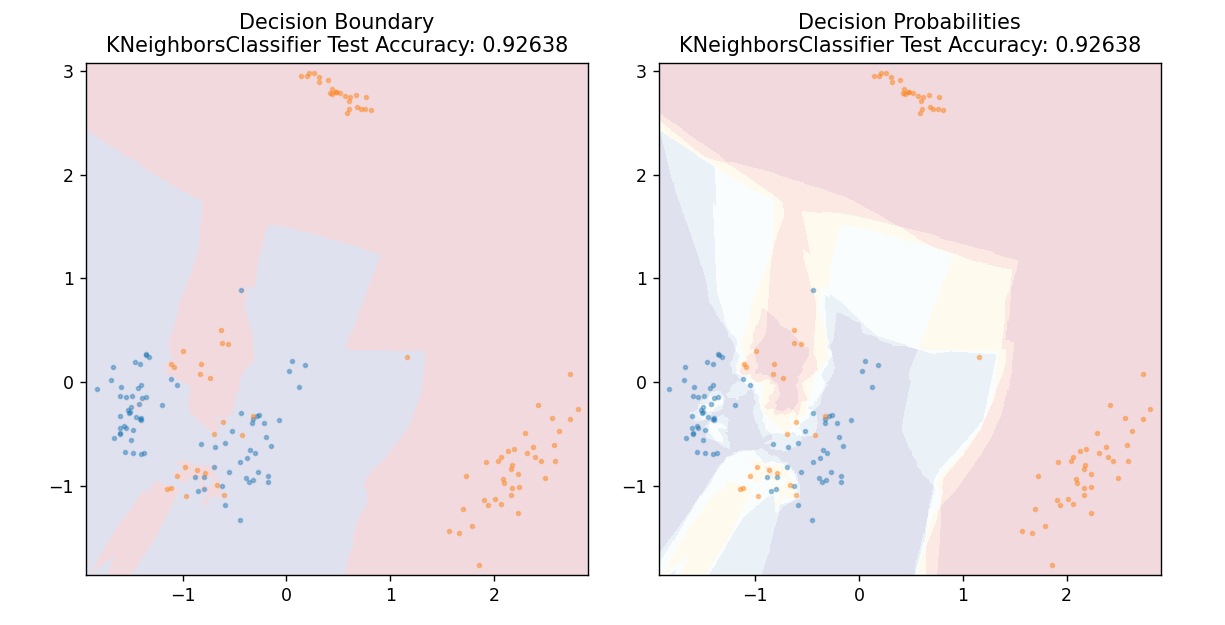

In [92]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

## 3.Decision Tree

<IPython.core.display.Javascript object>


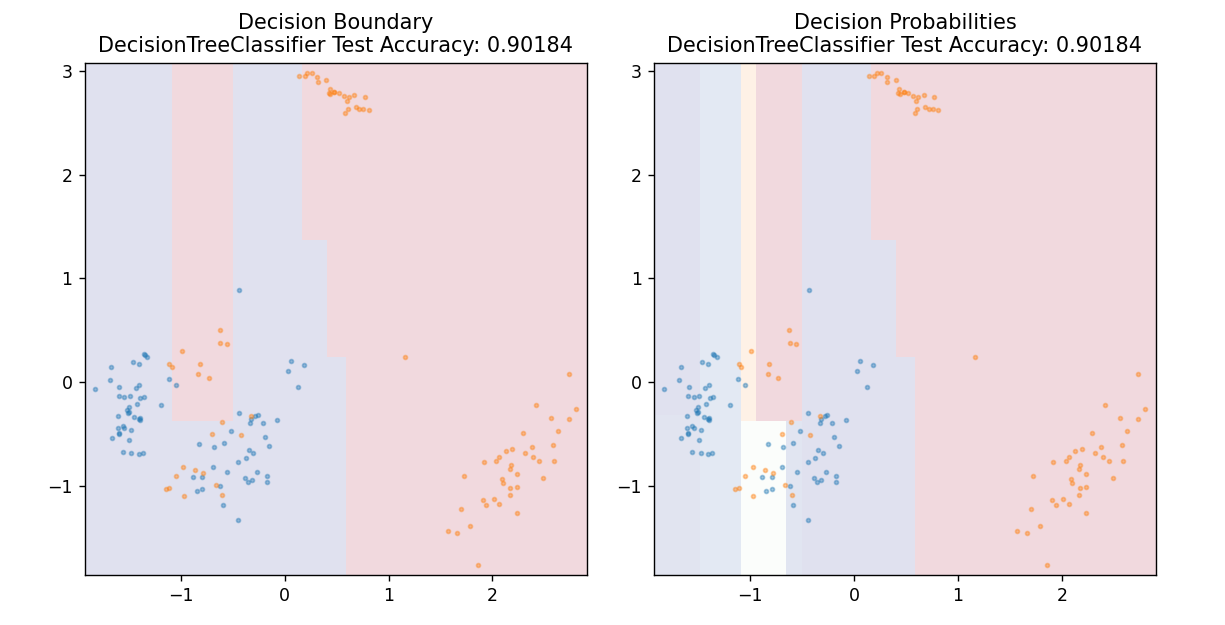

In [98]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

<IPython.core.display.Javascript object>


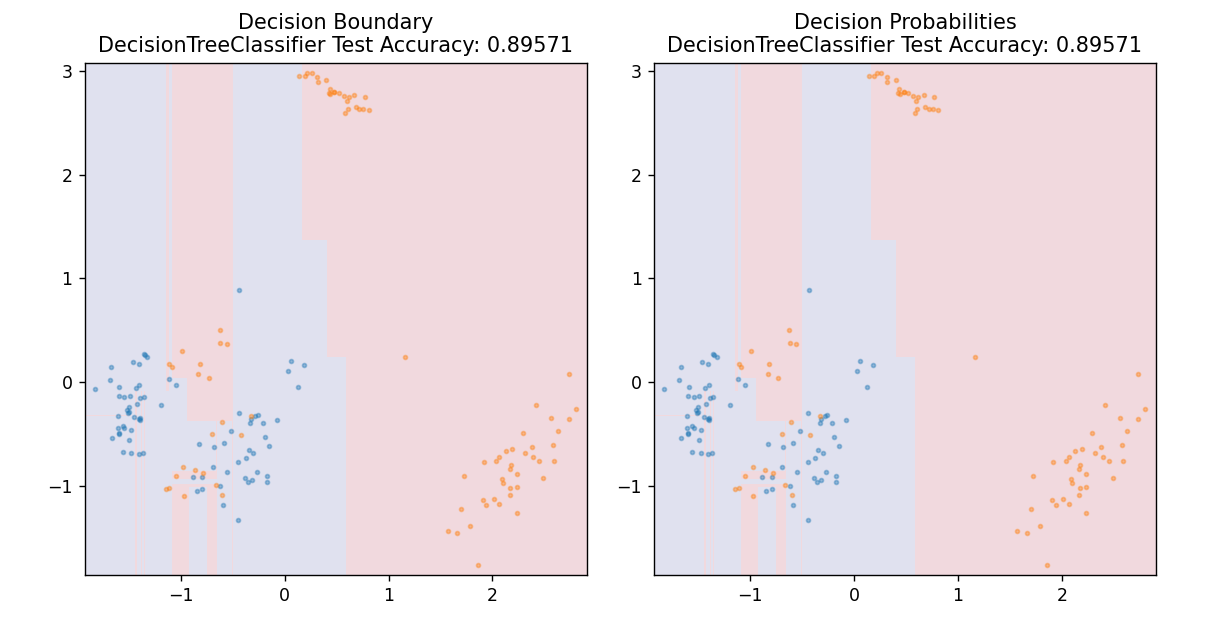

In [99]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

## 4. Random Forest Classifier

<IPython.core.display.Javascript object>


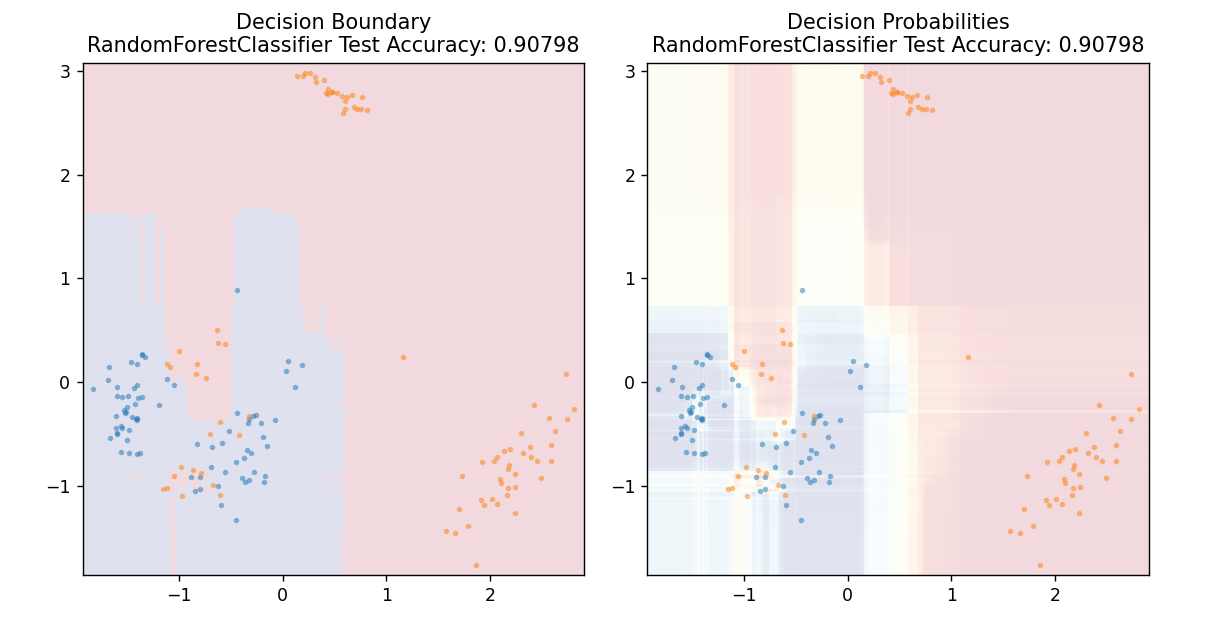

In [101]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train,y_train)
plot_mushroom_boundary(X_test, y_test, model)

## 5. Support Vector Machine

<IPython.core.display.Javascript object>


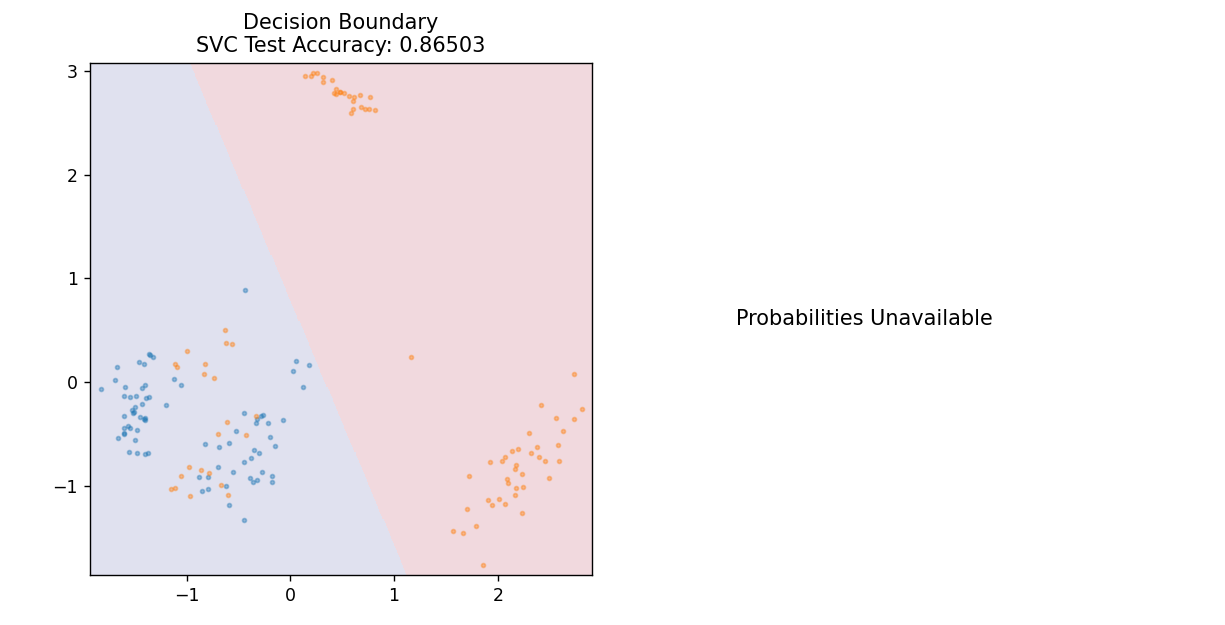

In [102]:
from sklearn.svm import SVC

model = SVC(kernel='linear').fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

<IPython.core.display.Javascript object>


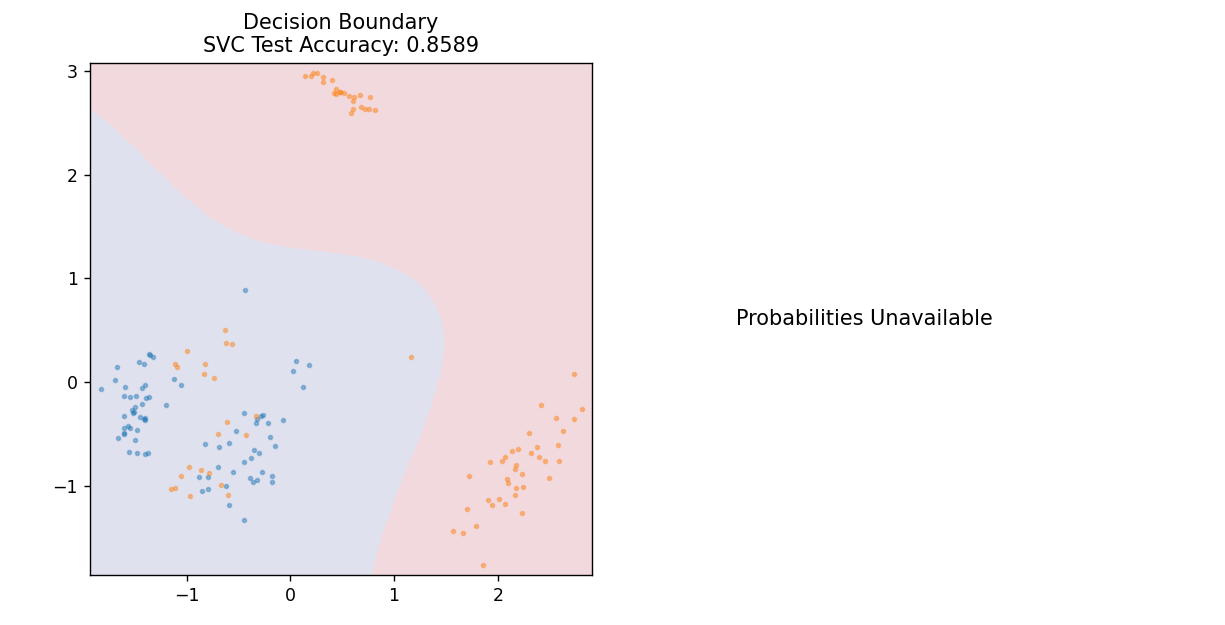

In [104]:
from sklearn.svm import SVC

model = SVC(kernel='rbf' , C=1).fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

<IPython.core.display.Javascript object>


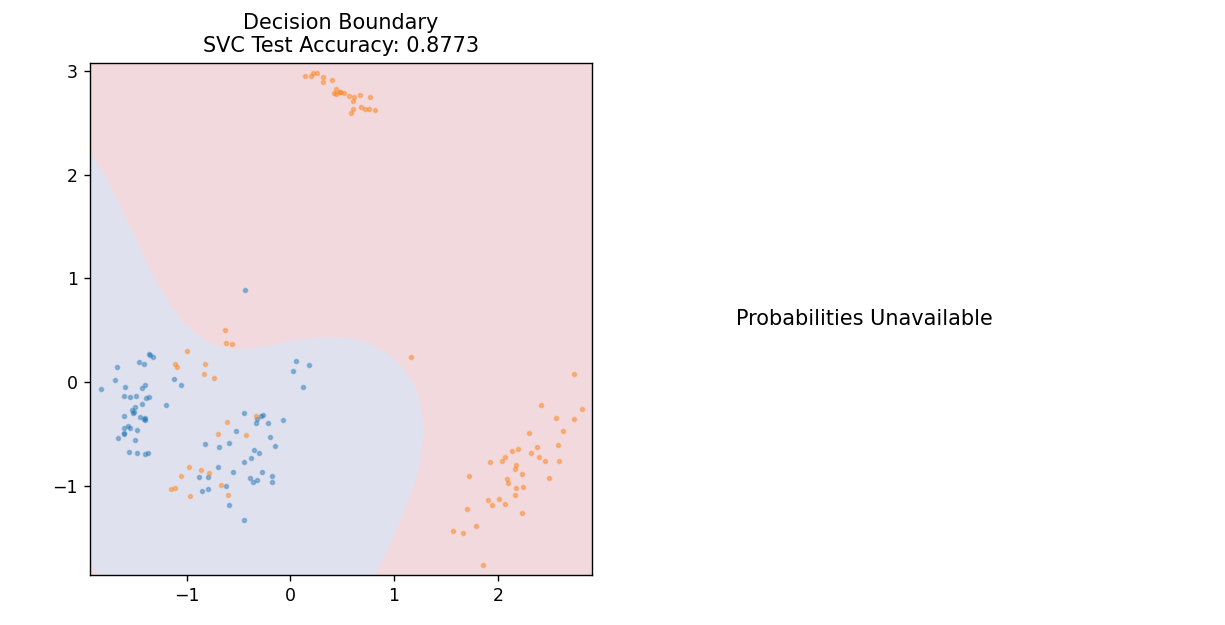

In [105]:
from sklearn.svm import SVC

model = SVC(kernel='rbf' , C=10).fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

## 6. Gaussian NB

<IPython.core.display.Javascript object>


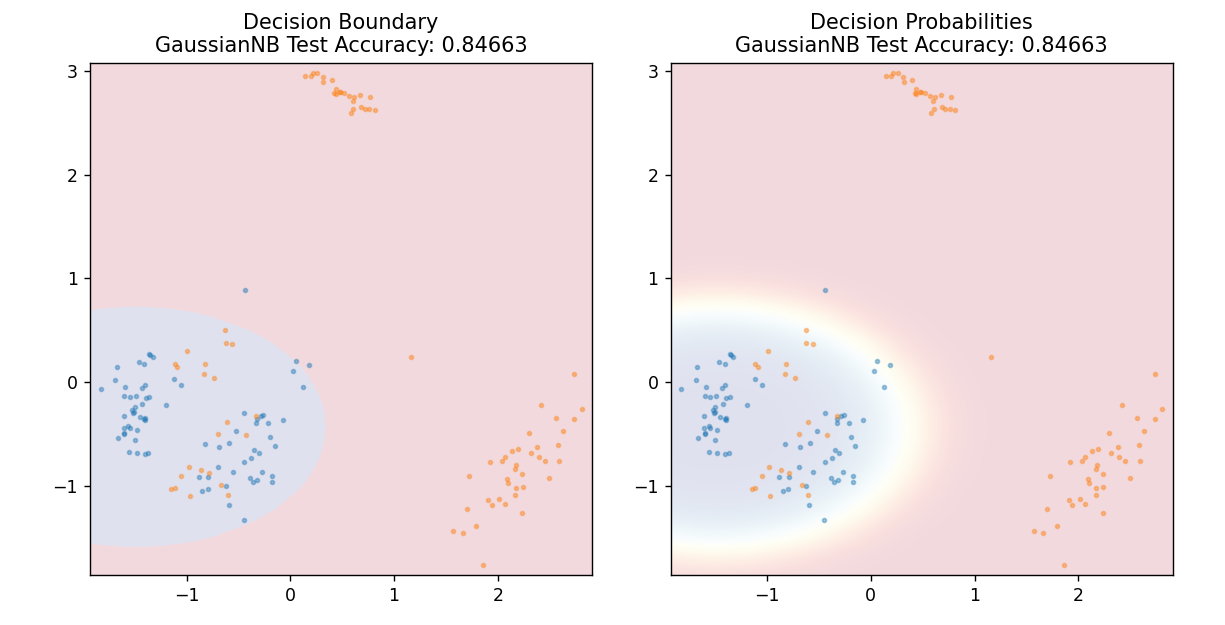

In [106]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train,y_train)
plot_mushroom_boundary(X_test,y_test,model)

## 7.  MLP Classifier

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>


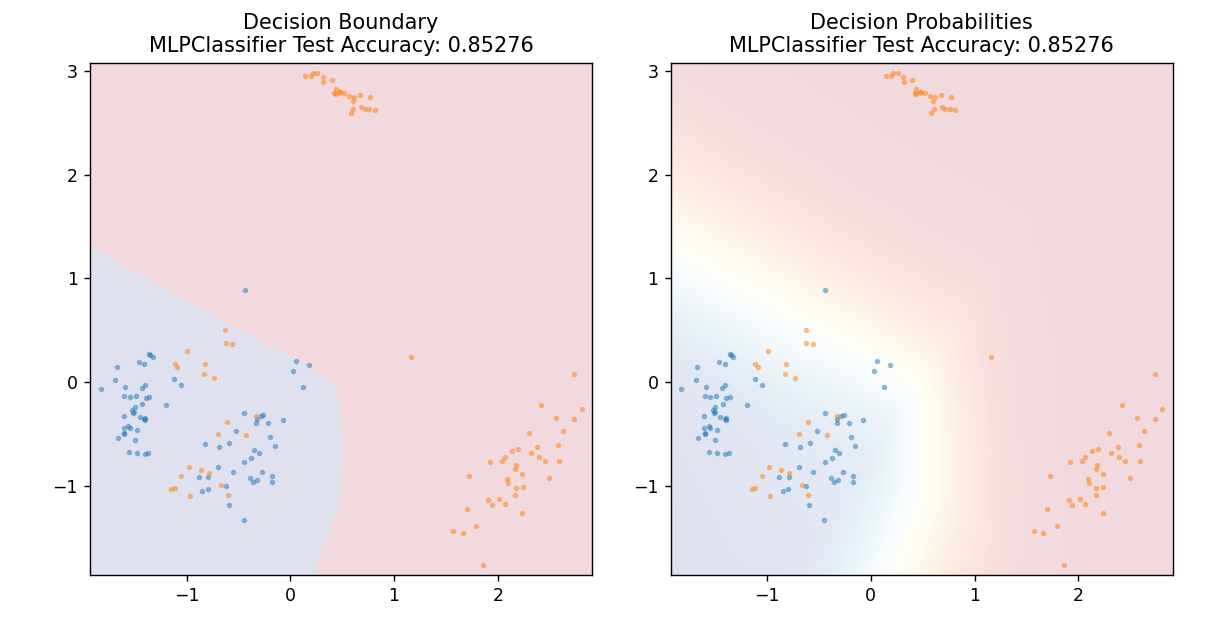

In [107]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(X_train,y_train)
plot_mushroom_boundary(X_test, y_test, model)